In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.3__all.3',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 15

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .3/

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

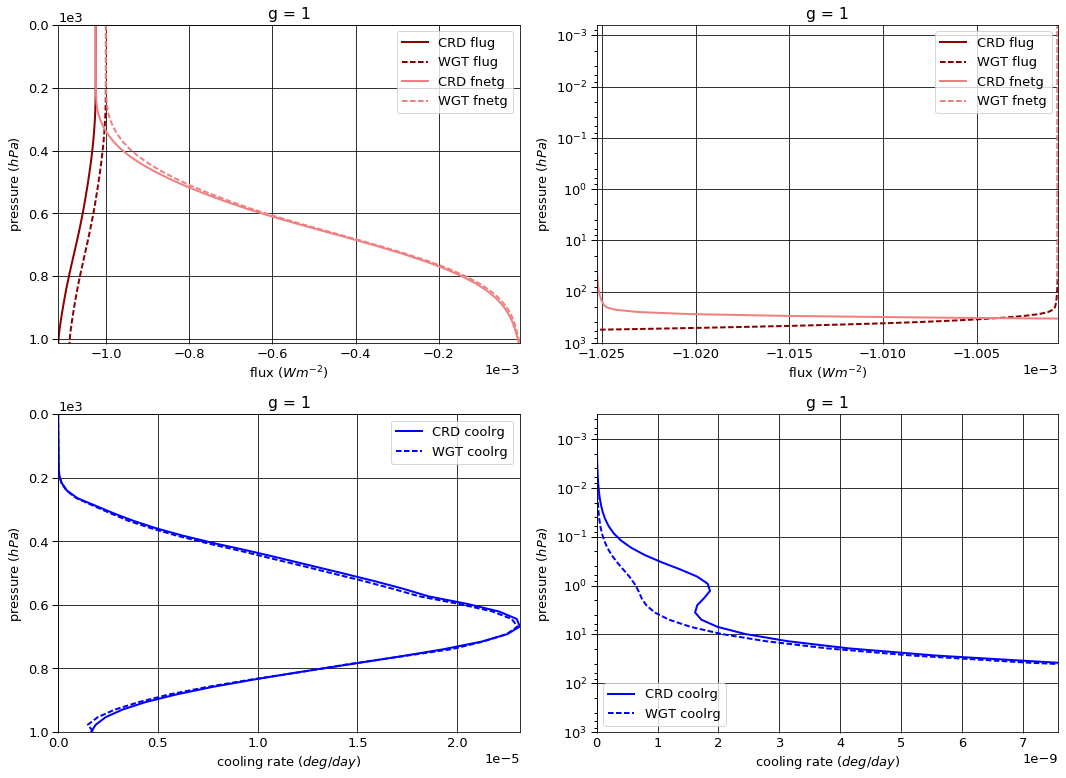

# Figure: flux, cooling rate g-group 2

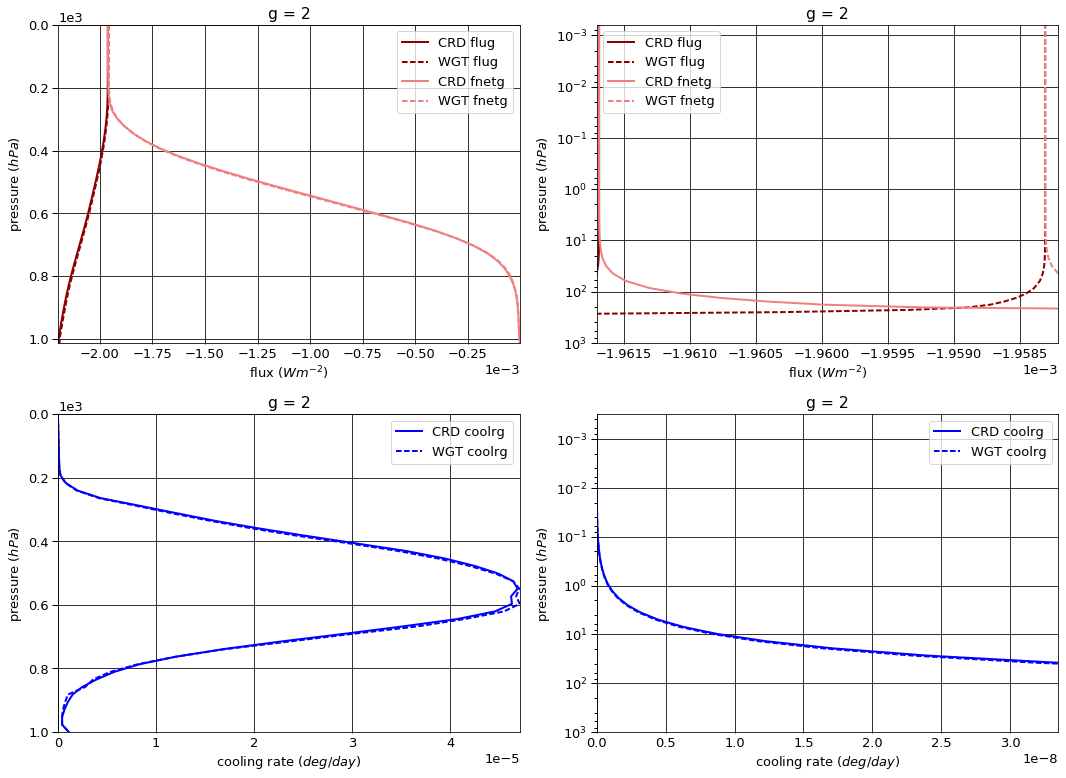

# Figure: flux, cooling rate g-group 3

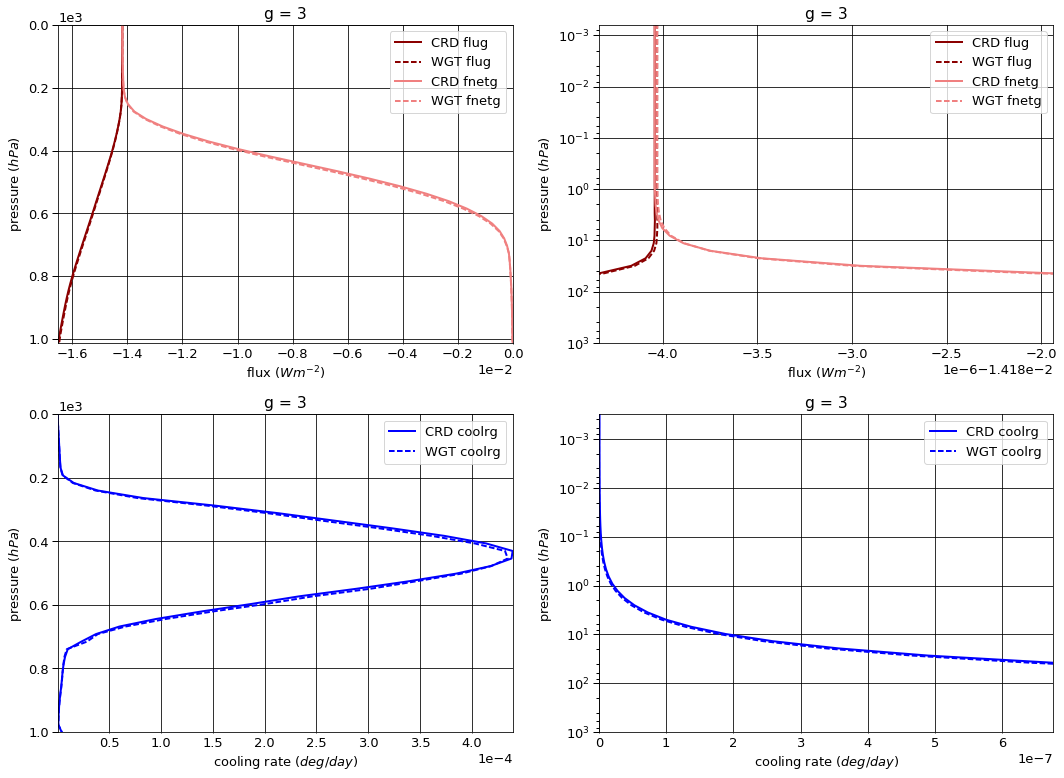

# Figure: flux, cooling rate g-group 4

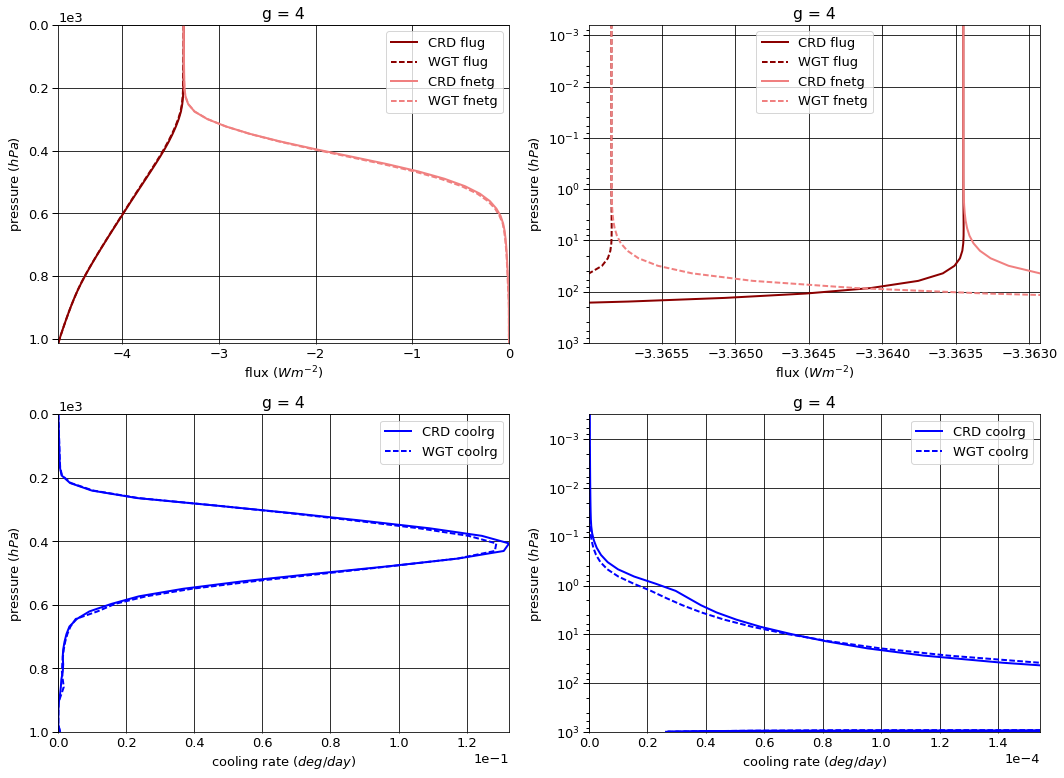

# Figure: flux, cooling rate g-group 5

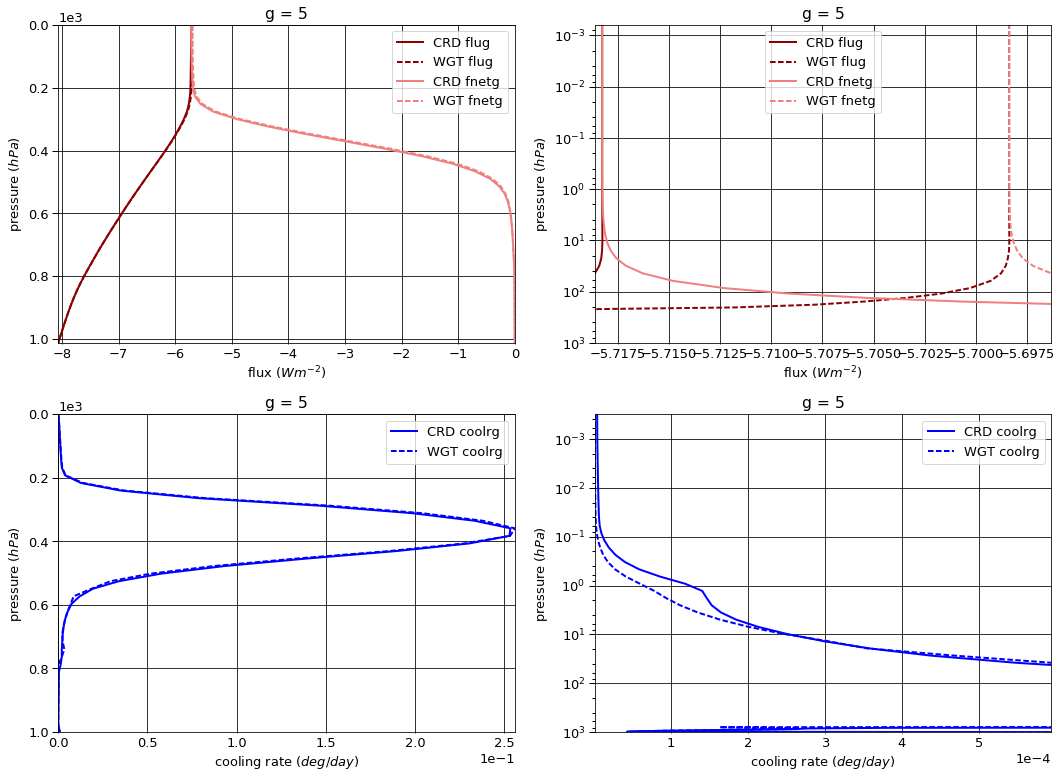

# Figure: flux, cooling rate g-group 6

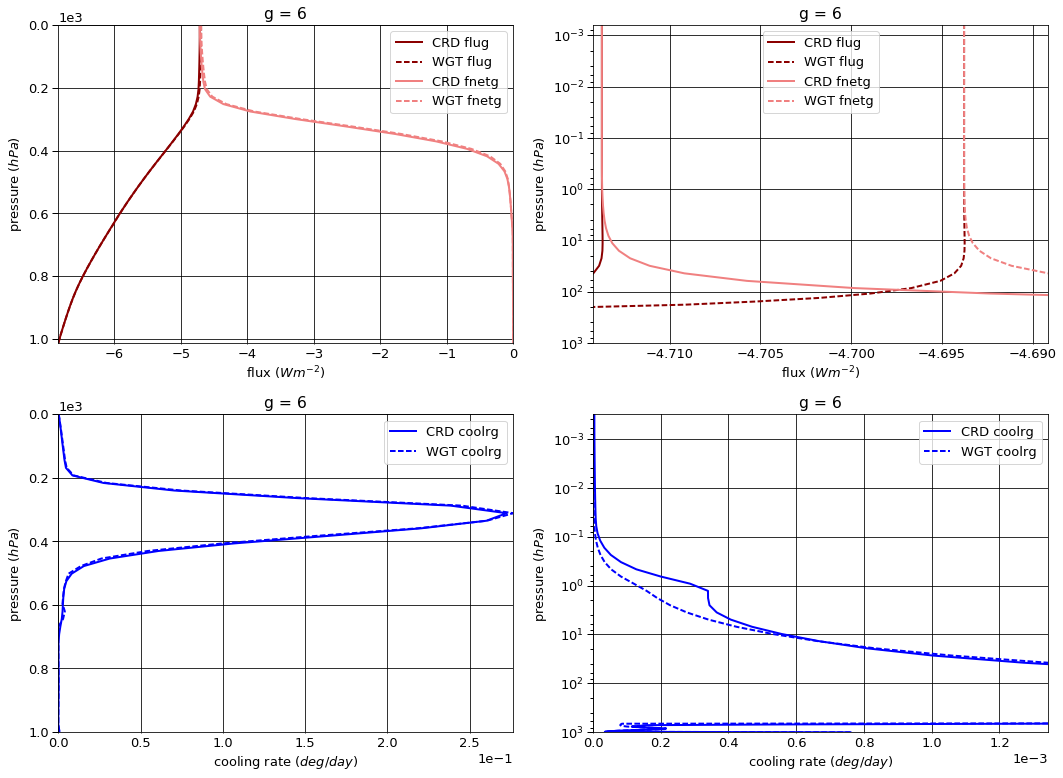

# Figure: flux, cooling rate g-group 7

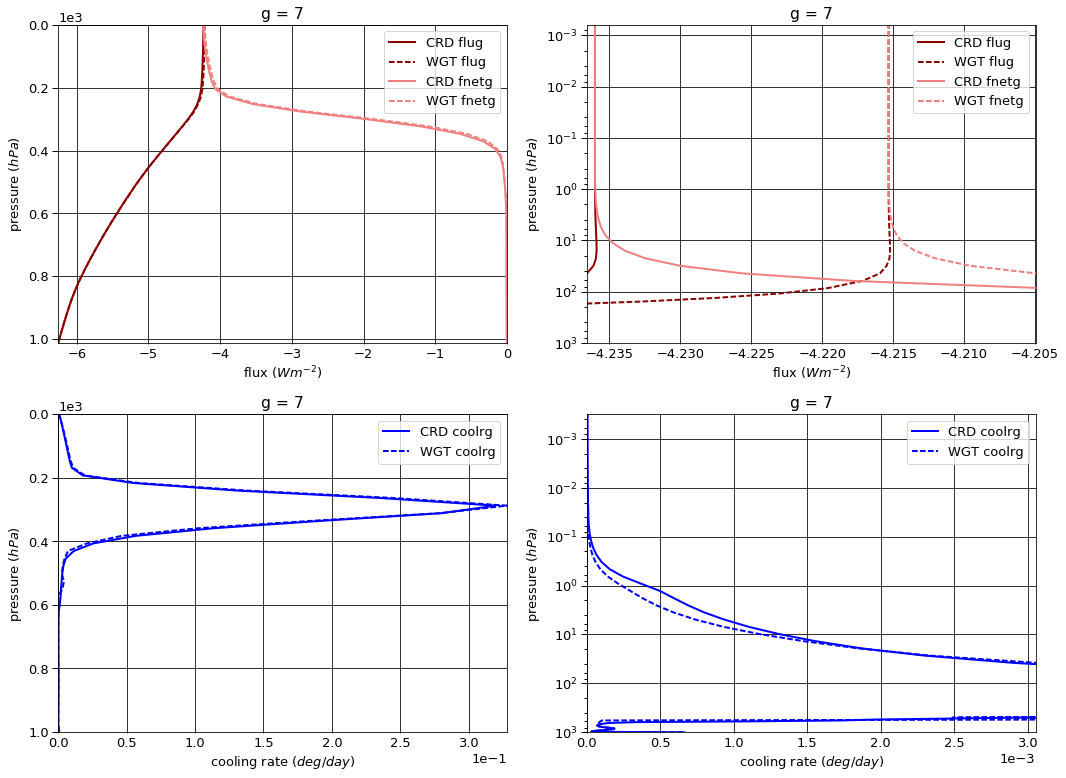

# Figure: flux, cooling rate g-group 8

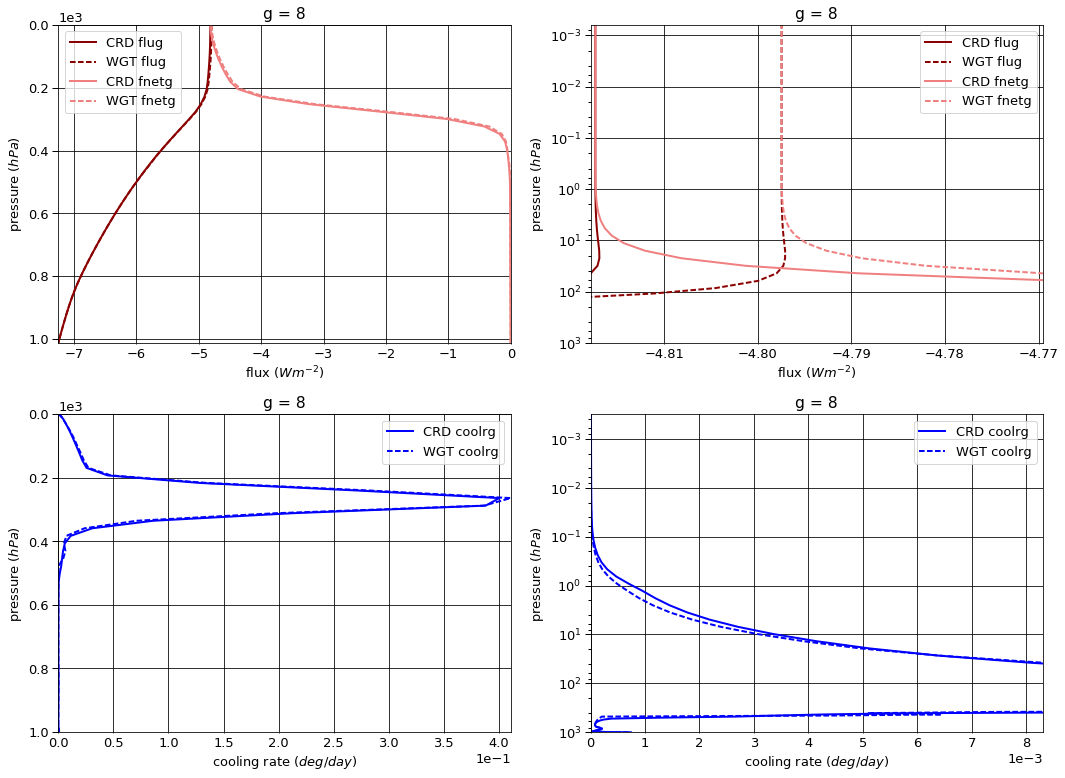

# Figure: flux, cooling rate g-group 9

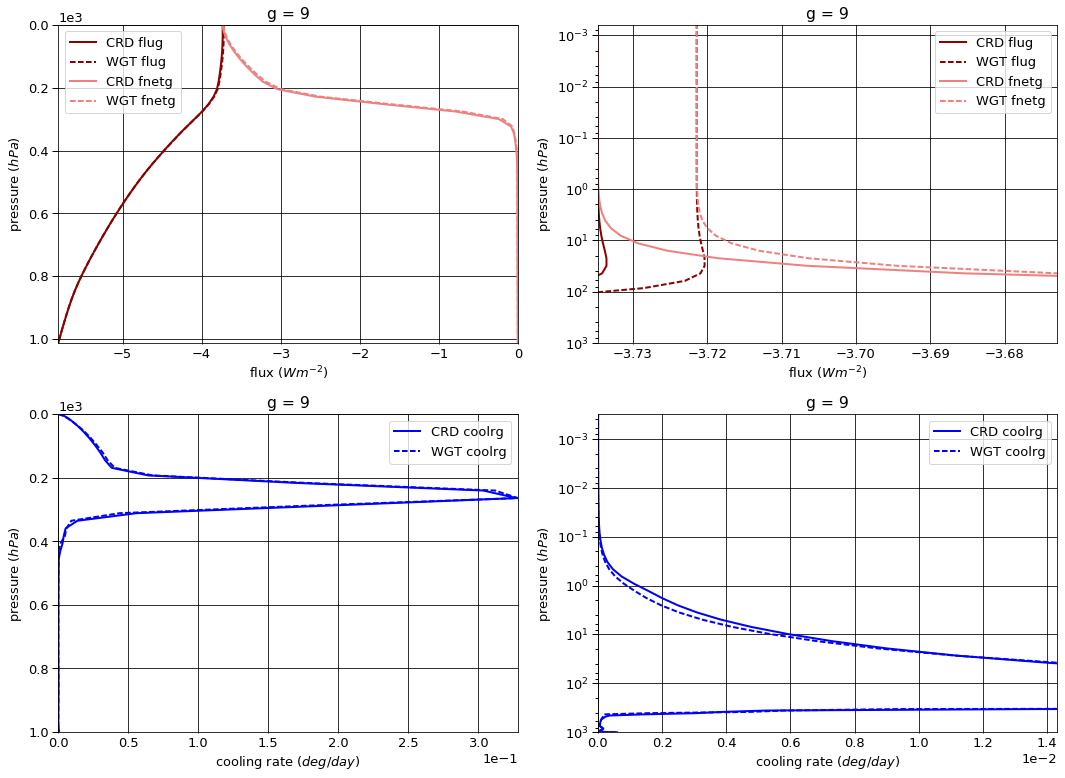

# Figure: flux, cooling rate g-group 10

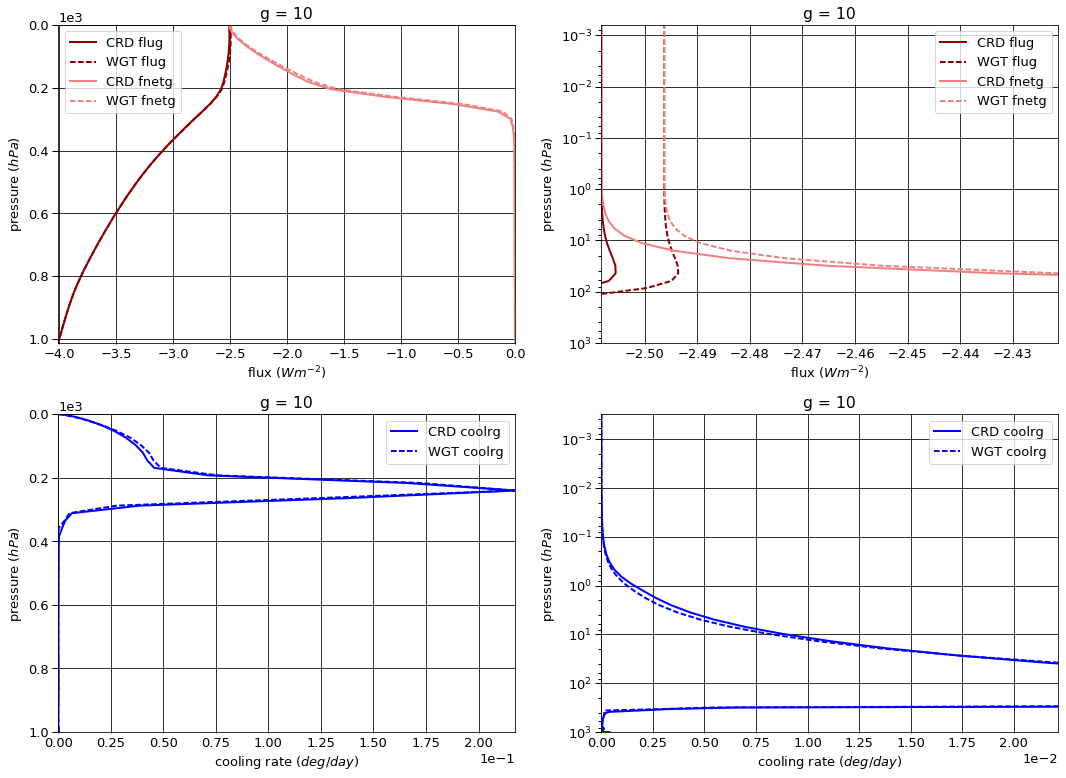

# Figure: flux, cooling rate g-group 11

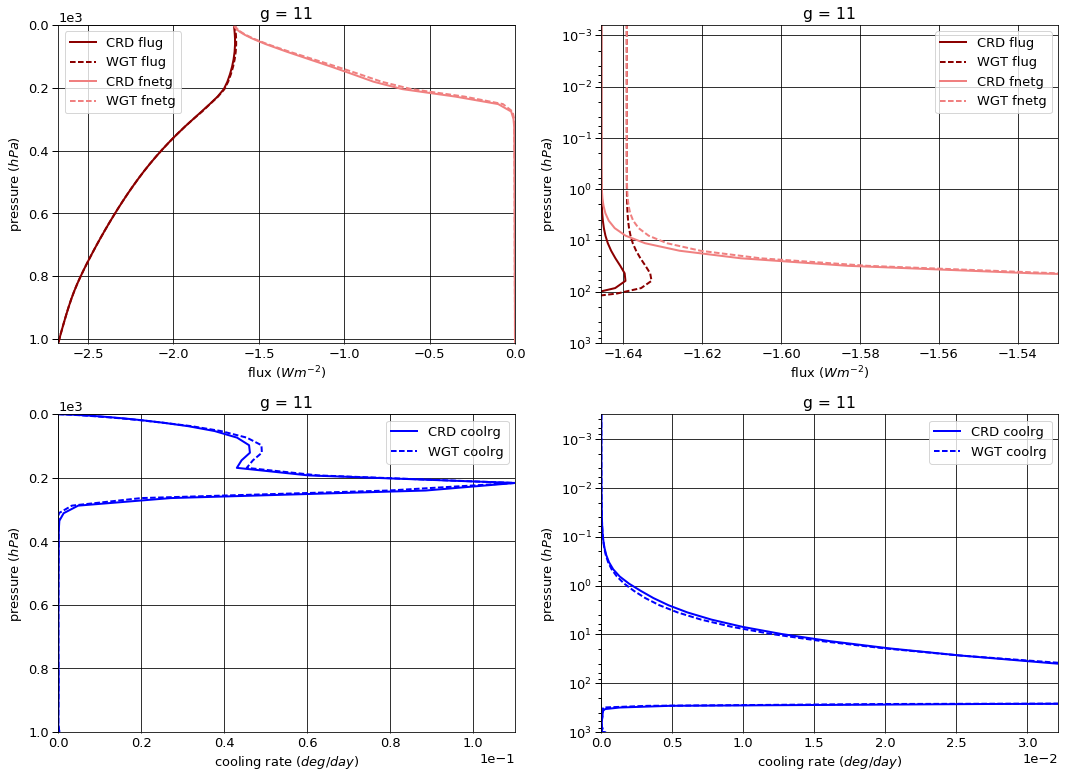

# Figure: flux, cooling rate g-group 12

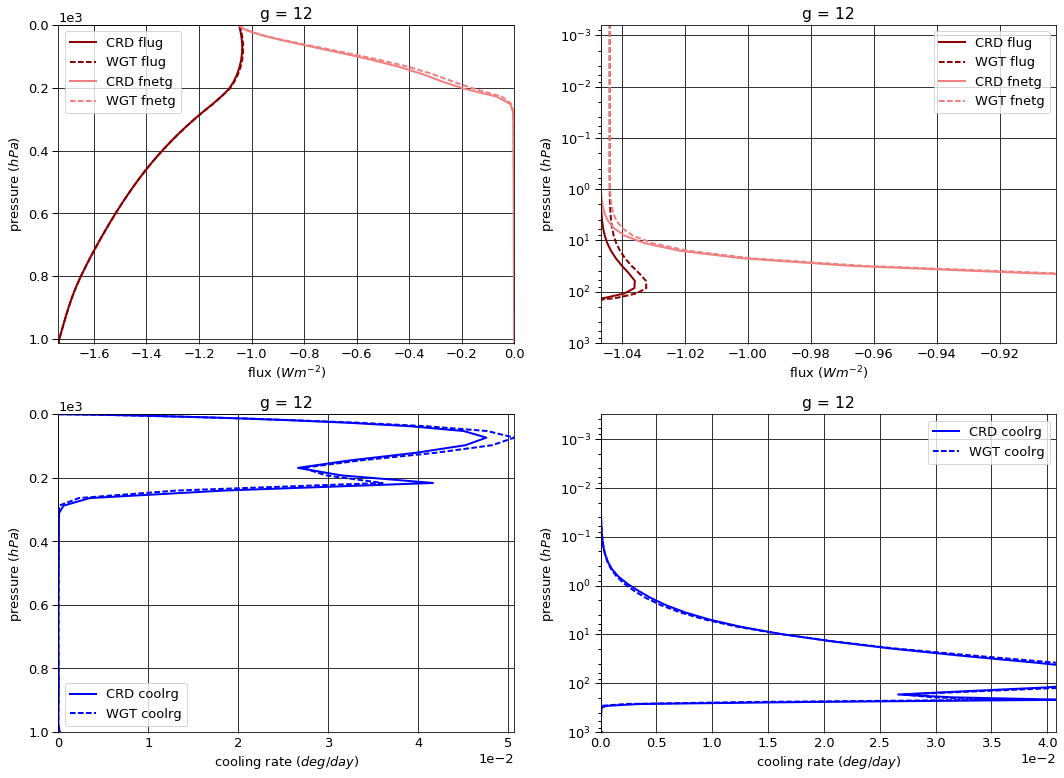

# Figure: flux, cooling rate g-group 13

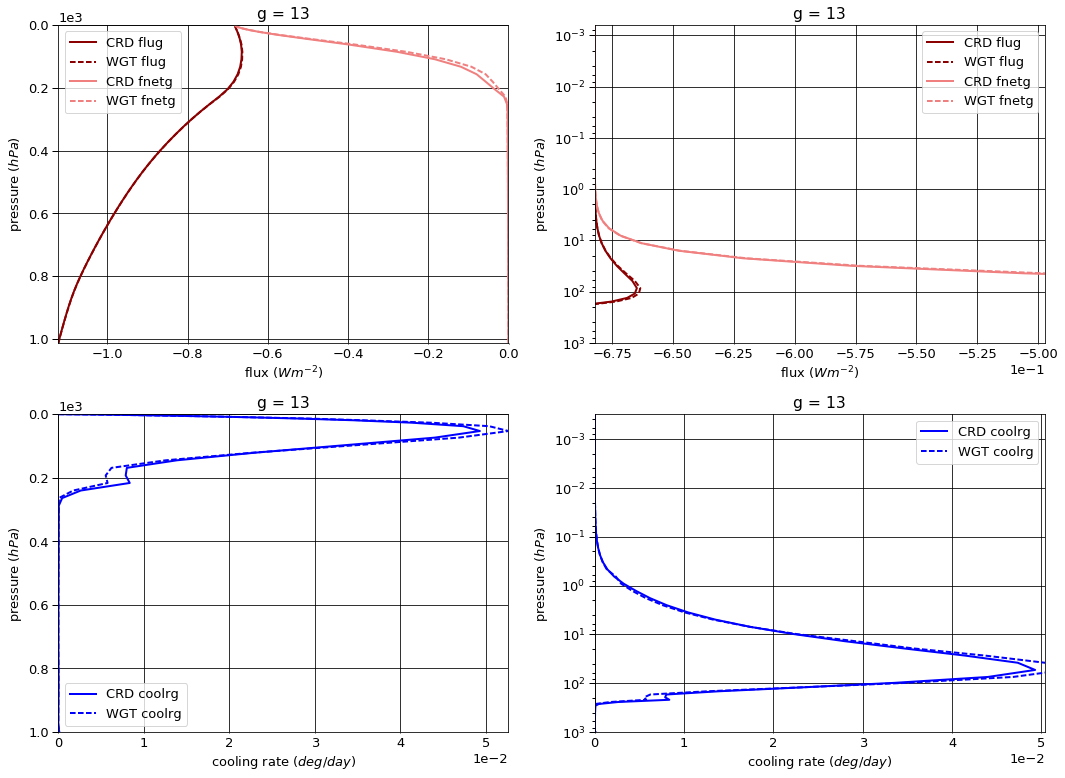

# Figure: flux, cooling rate g-group 14

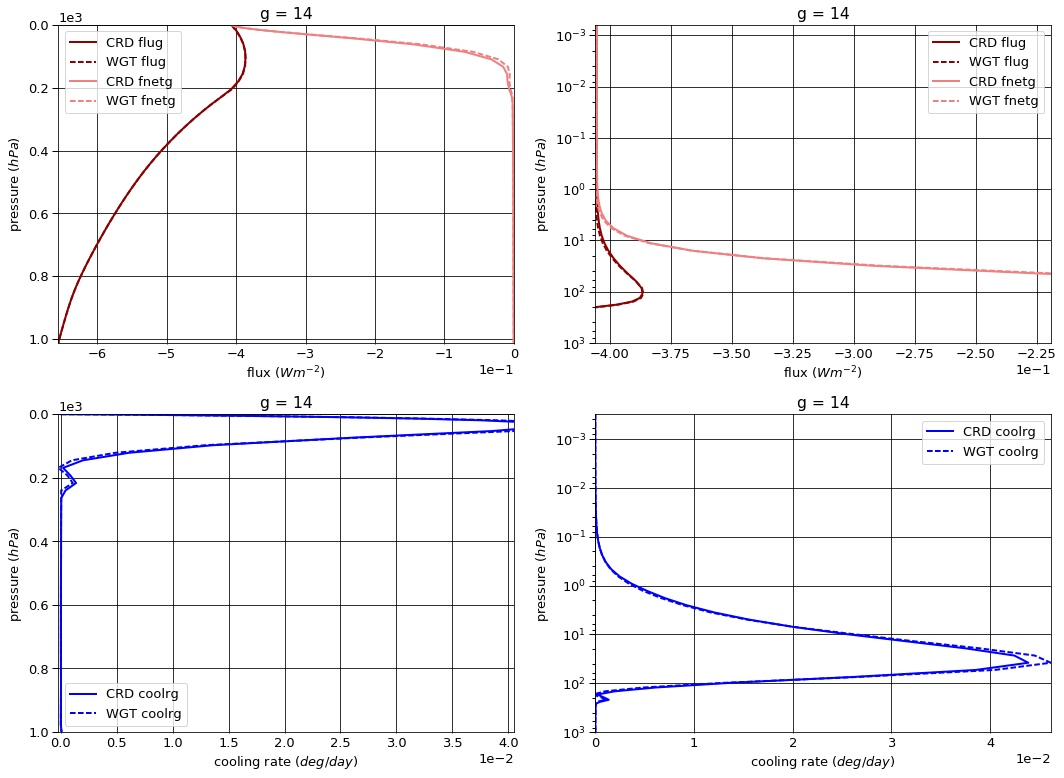

# Figure: flux, cooling rate g-group 15

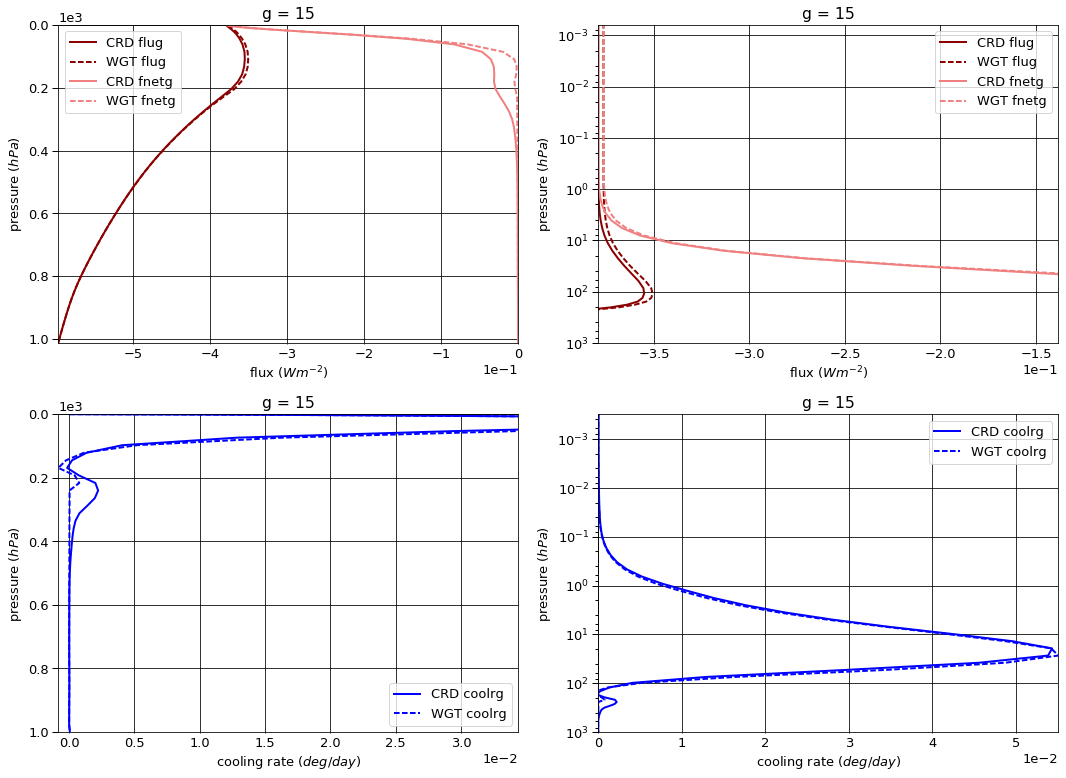

# Figure: flux, cooling rate g-group 16

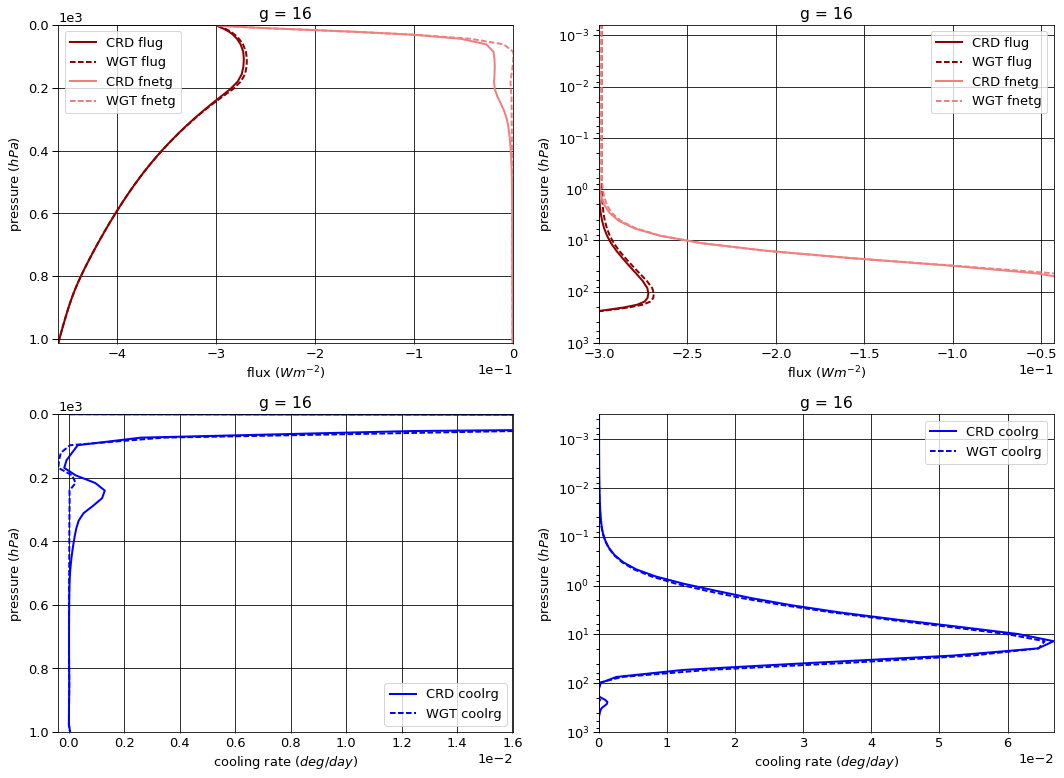

# Figure: flux, cooling rate g-group 17

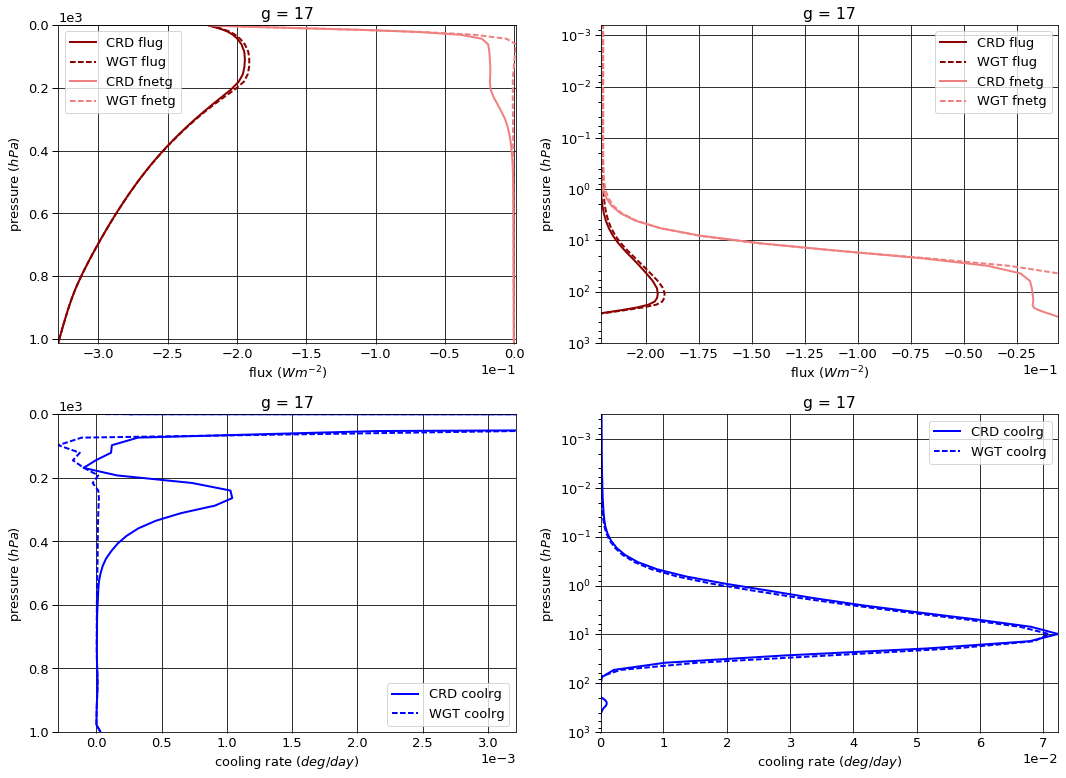

# Figure: flux, cooling rate g-group 18

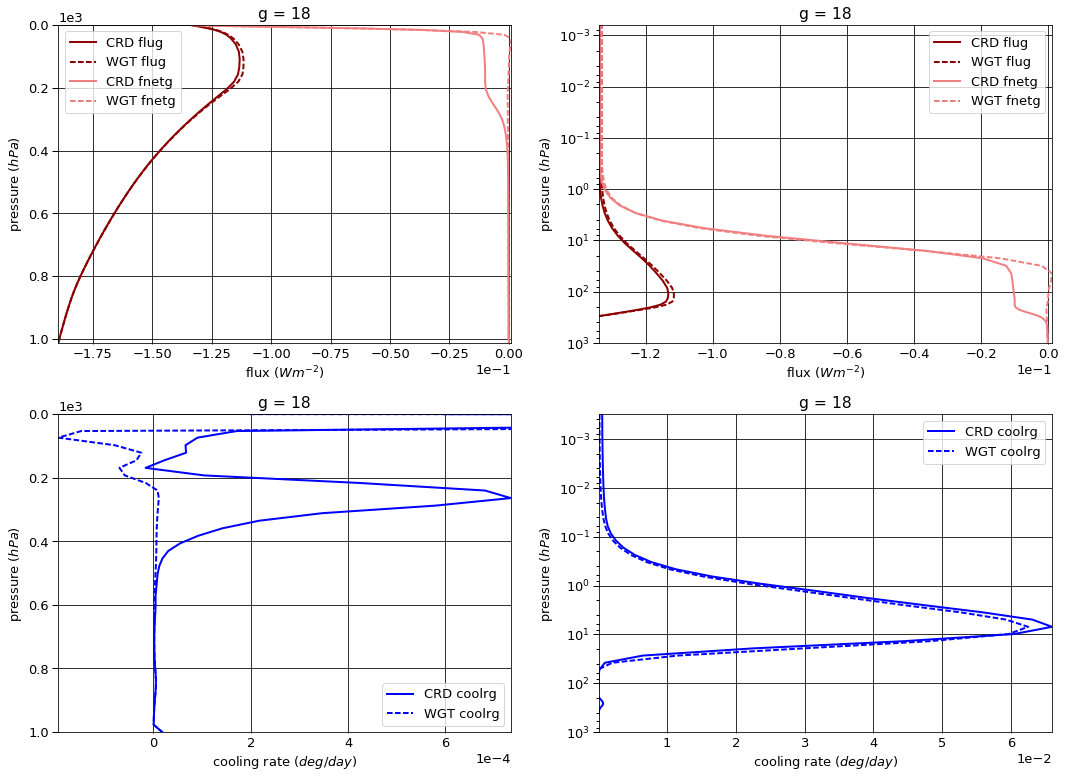

# Figure: flux, cooling rate g-group 19

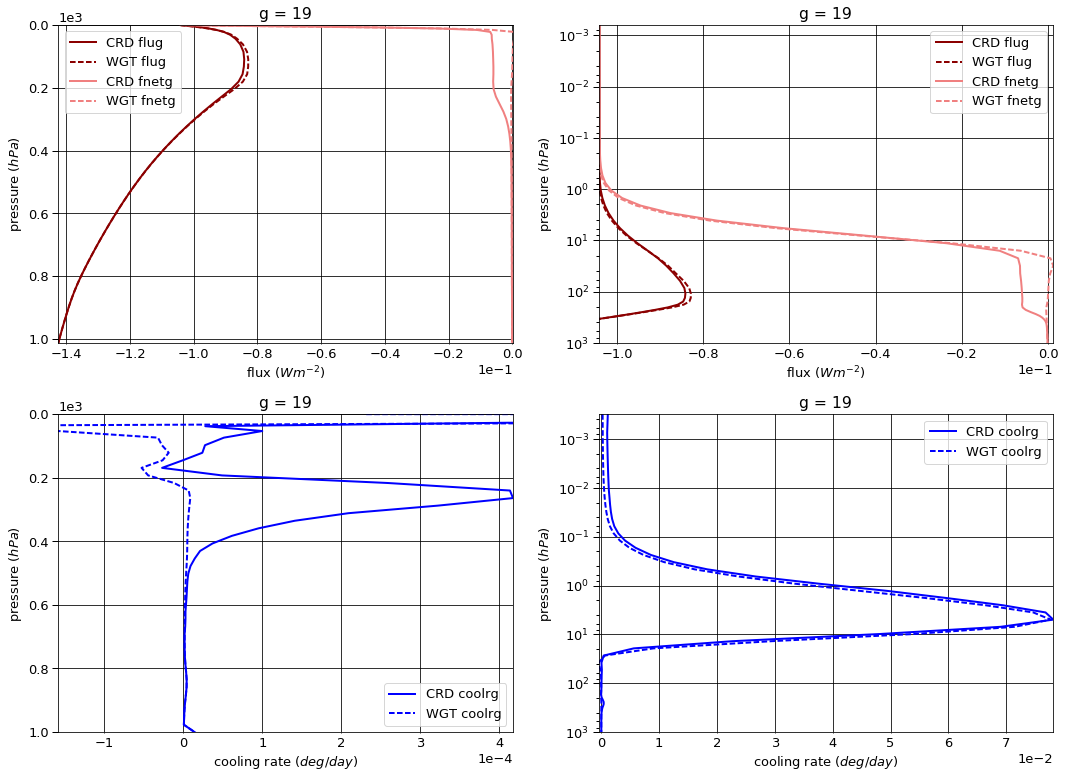

# Figure: flux, cooling rate g-group 20

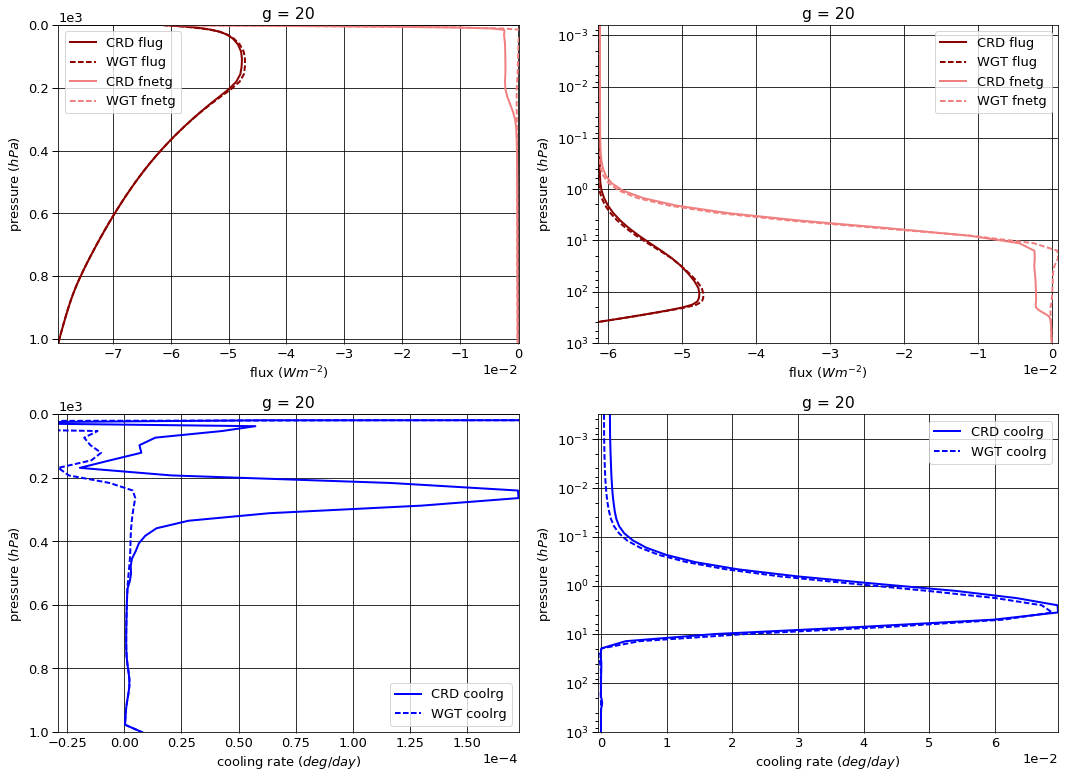

# Figure: flux, cooling rate g-group 21

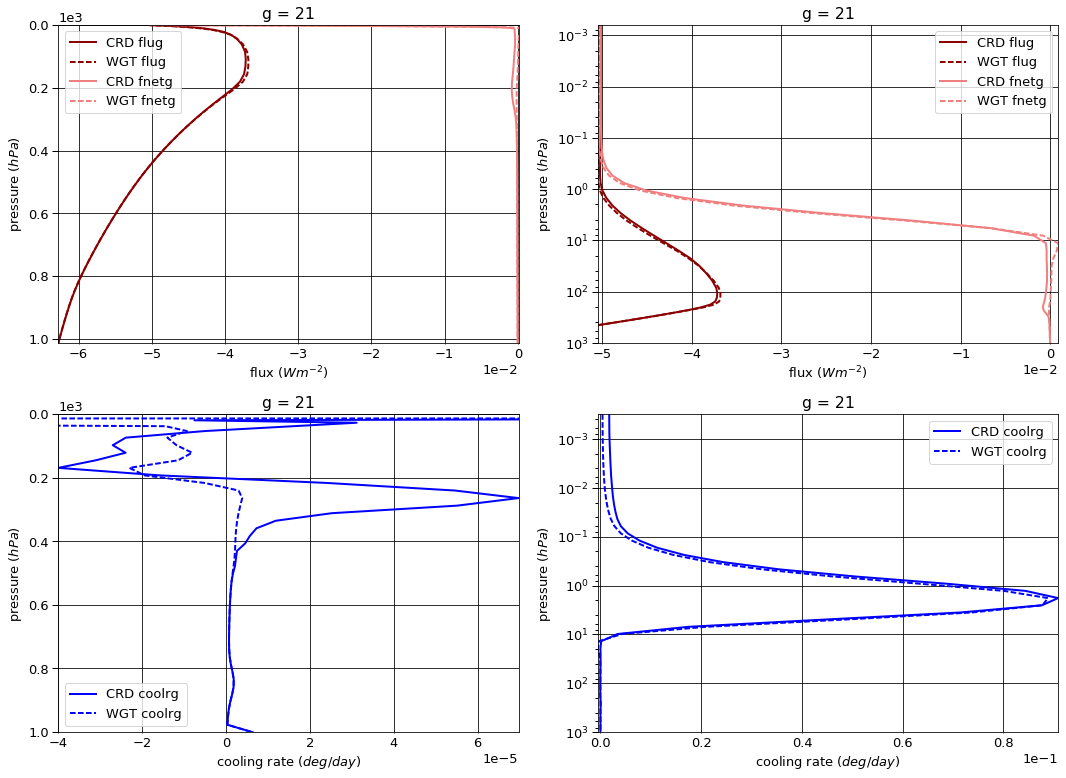

# Figure: flux, cooling rate g-group 22

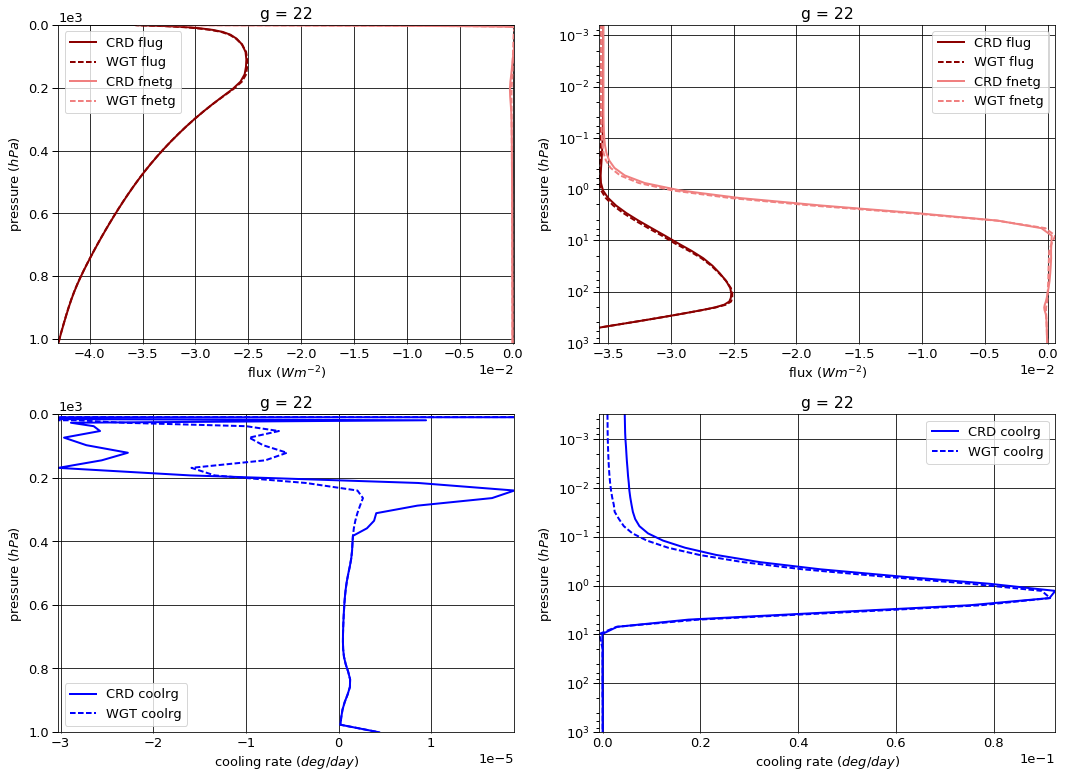

# Figure: flux, cooling rate g-group 23

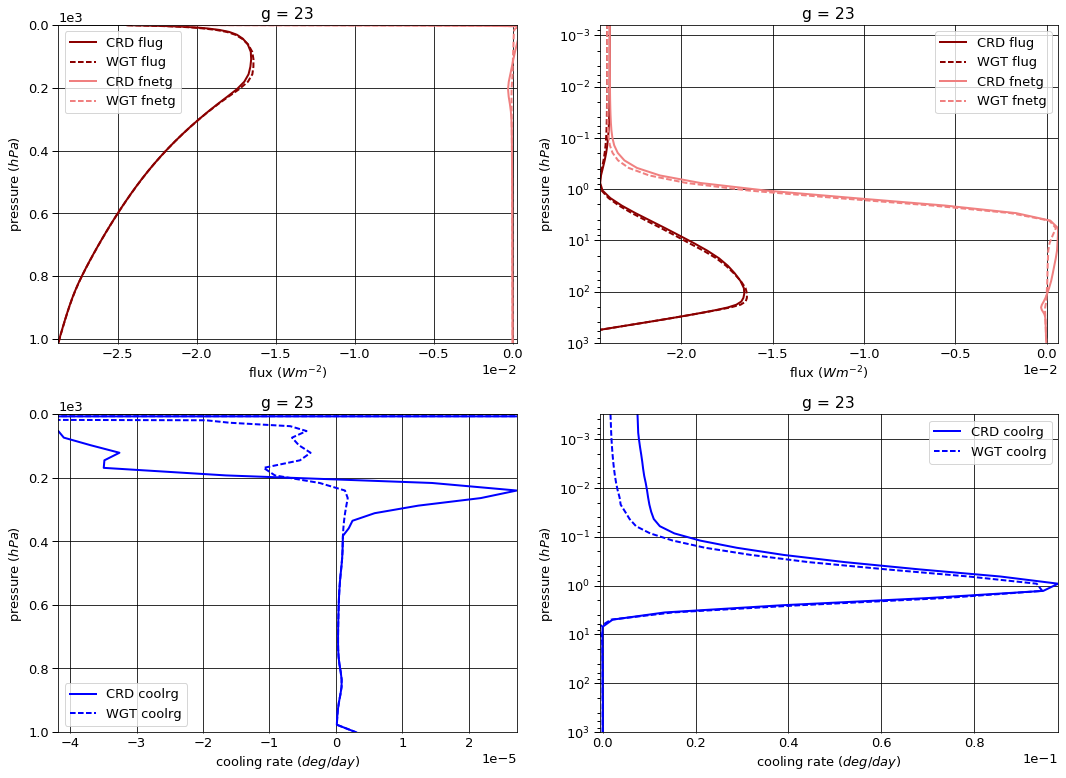

# Figure: flux, cooling rate g-group 24

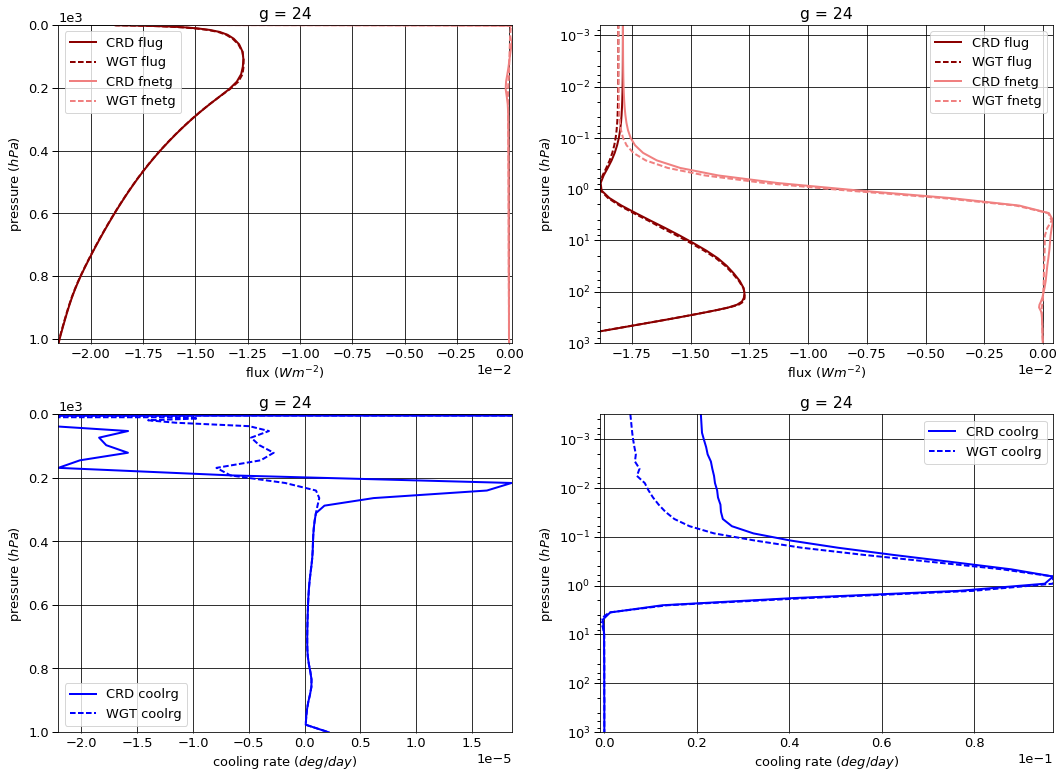

# Figure: flux, cooling rate g-group 25

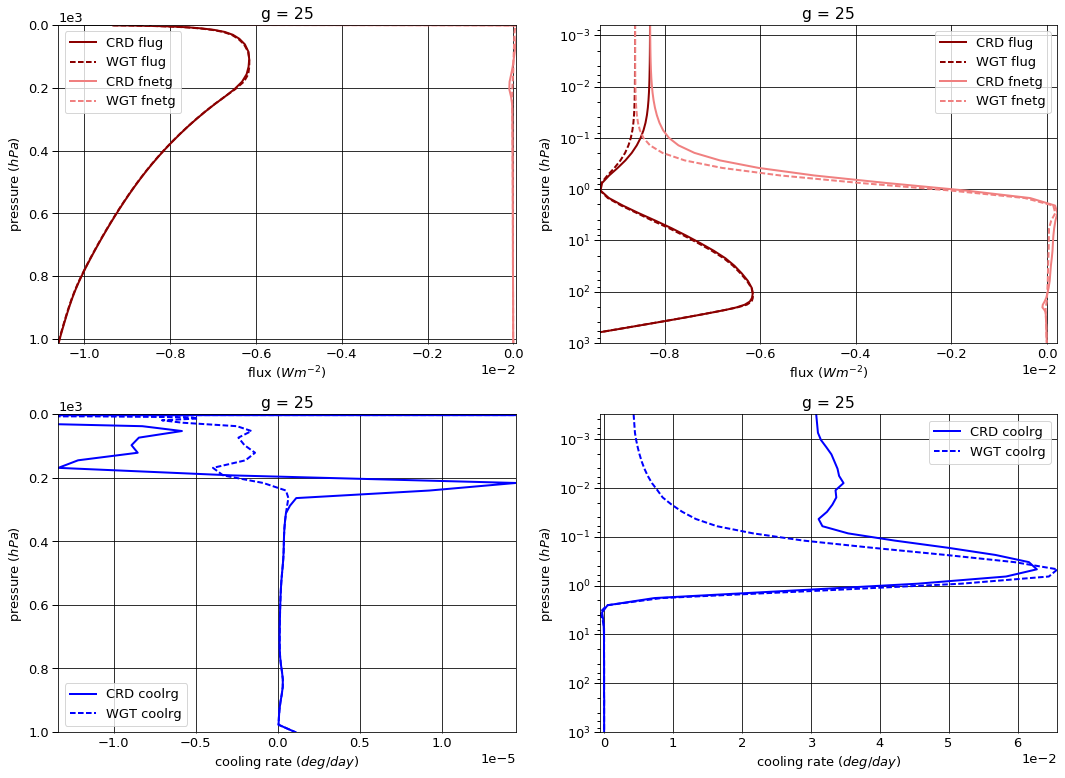

# Figure: flux, cooling rate g-group 26

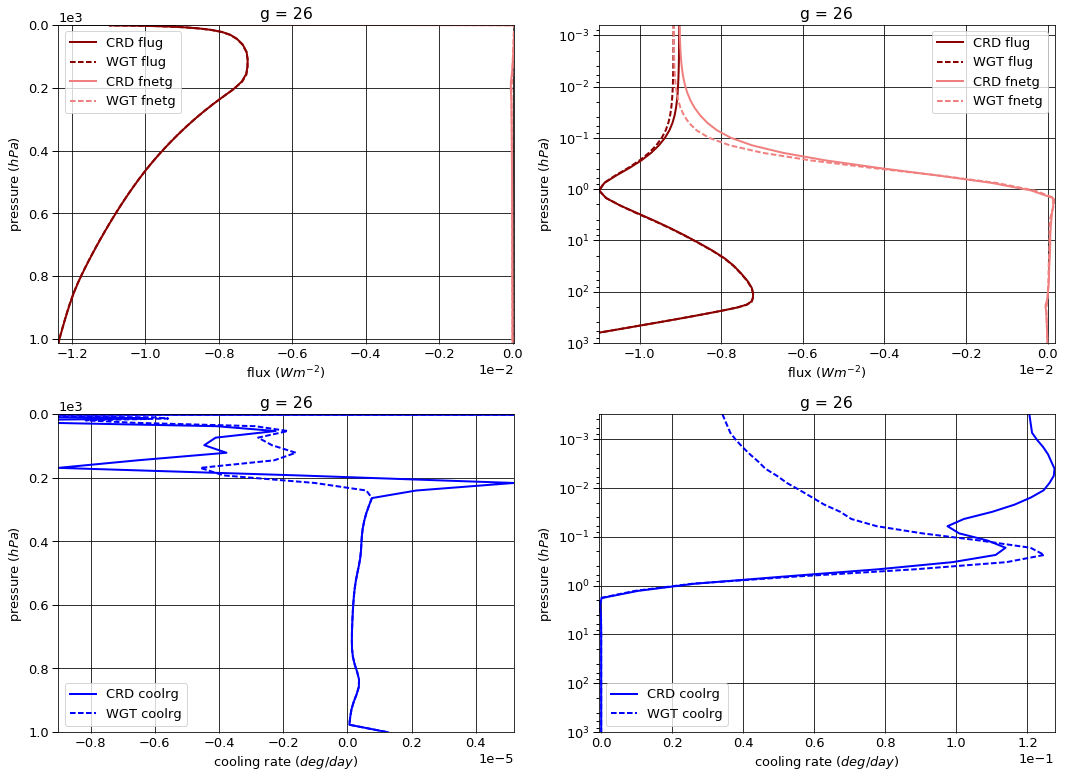

# Figure: flux, cooling rate g-group 27

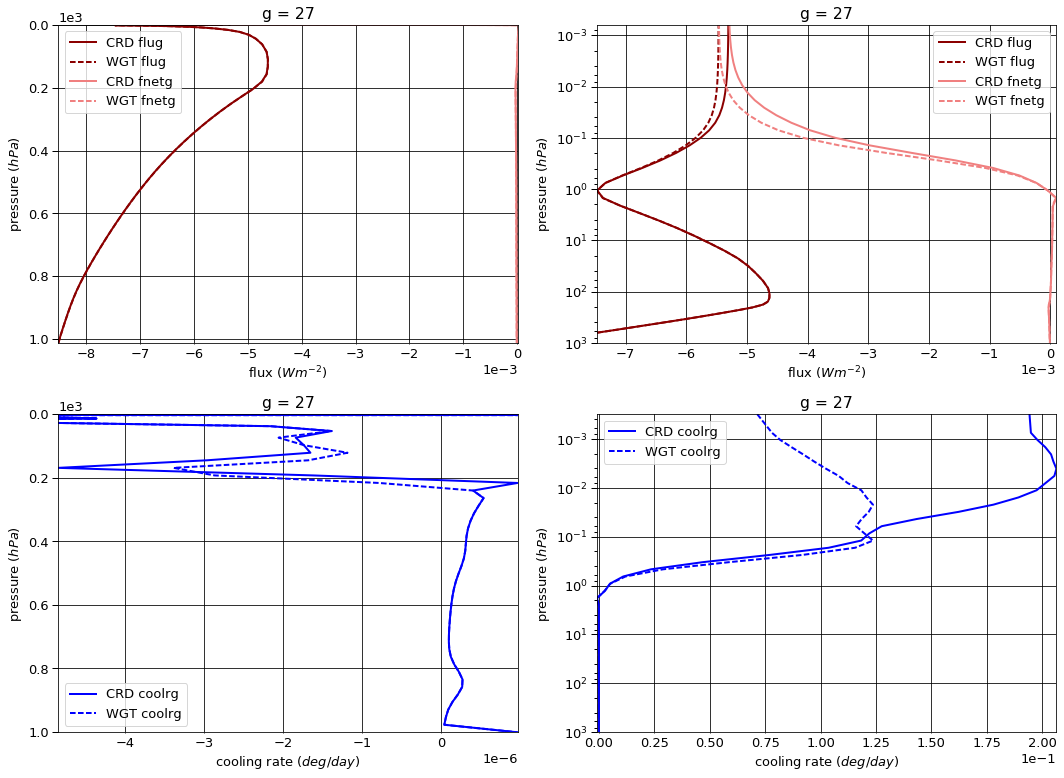

# Figure: flux, cooling rate g-group 28

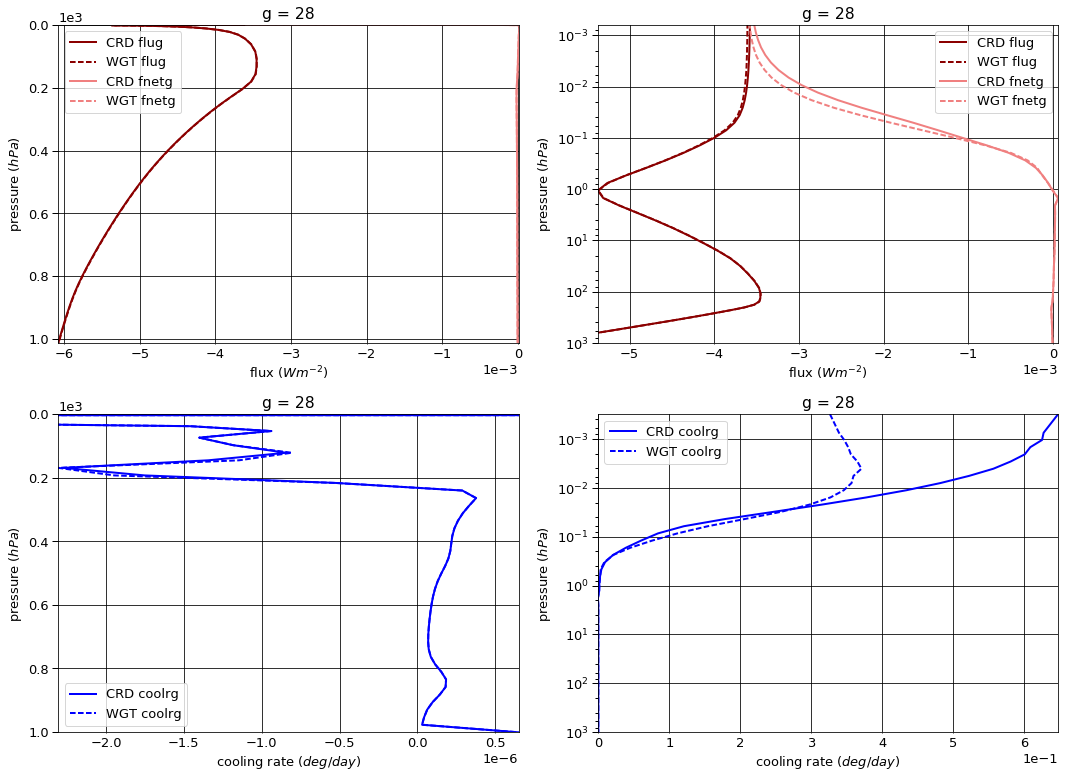

# Figure: flux, cooling rate g-group 29

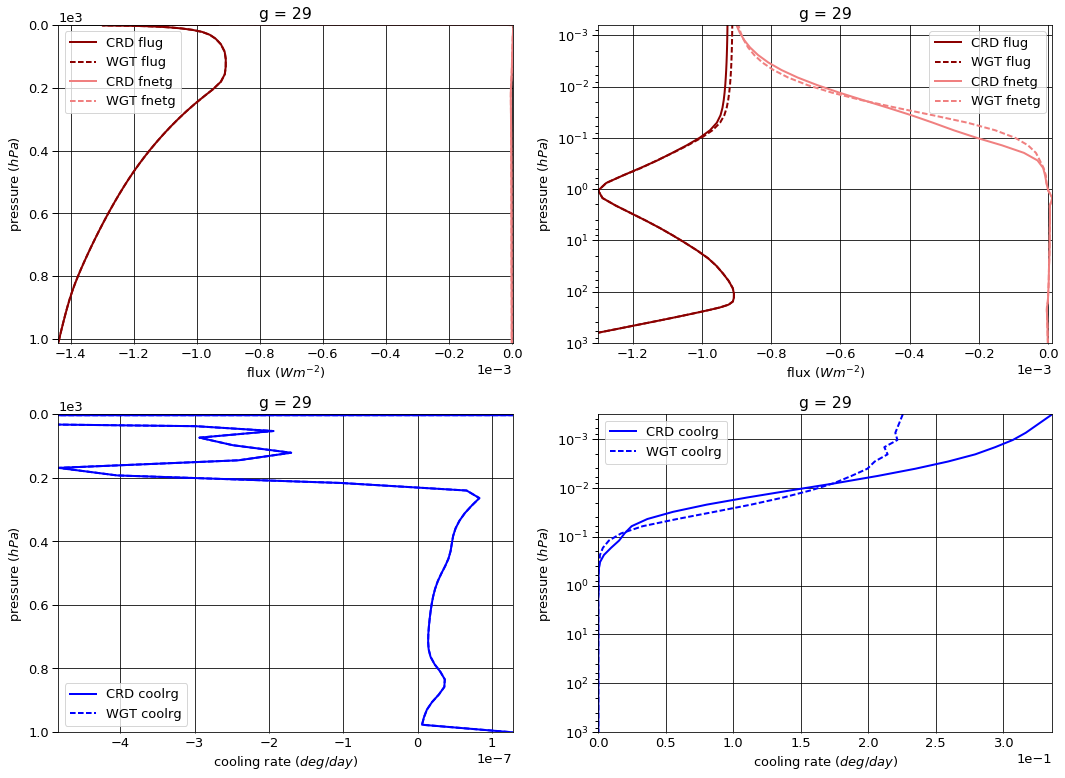

# Figure: flux, cooling rate g-group 30

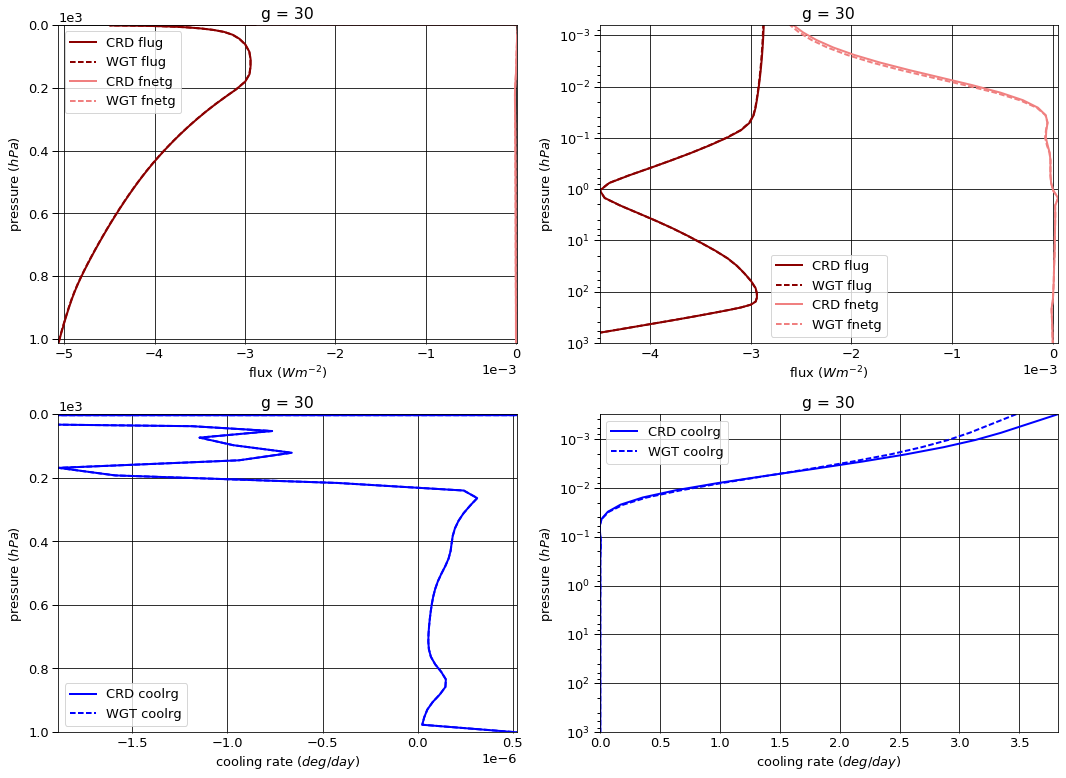

# Figure: flux, cooling rate g-group total

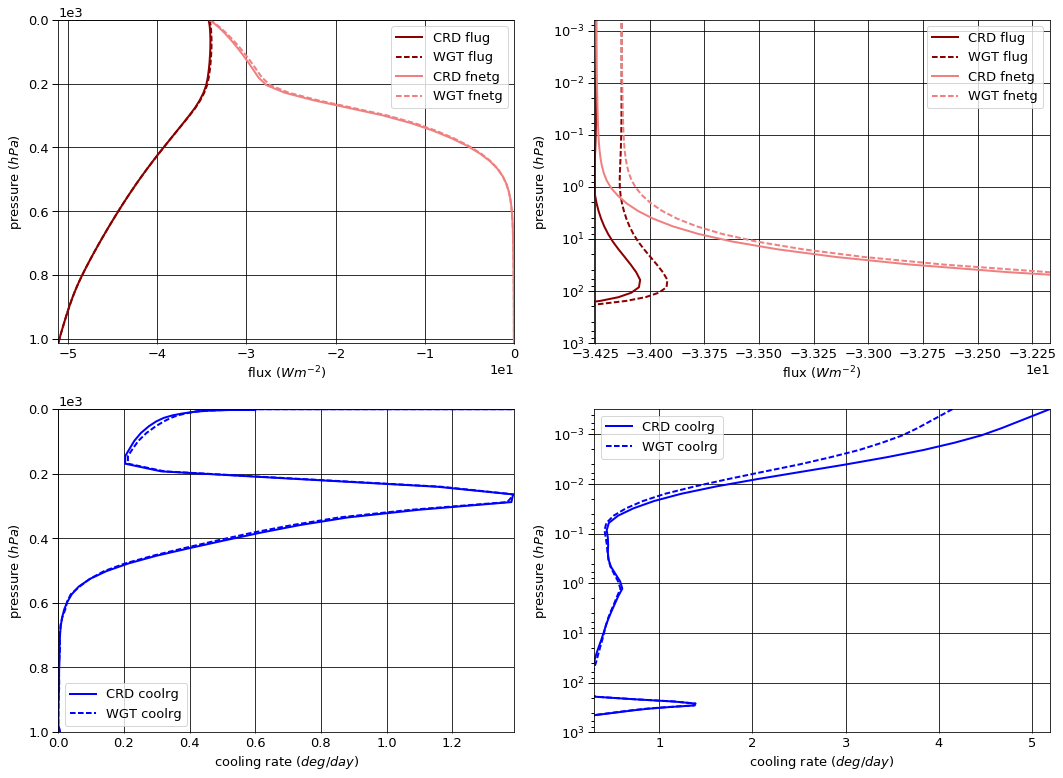

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001025  0.000000 -1.025277e-03
   1013.0   76    -0.001115  0.001108 -7.263640e-06
2  0.0      1     -0.001962  0.000000 -1.961687e-03
   1013.0   76    -0.002197  0.002193 -3.543532e-06
3  0.0      1     -0.014184  0.000000 -1.418404e-02
   1013.0   76    -0.016507  0.016496 -1.098748e-05
4  0.0      1     -3.363449  0.000000 -3.363449e+00
   1013.0   76    -4.659400  4.657811 -1.588805e-03
5  0.0      1     -5.718265  0.000000 -5.718265e+00
   1013.0   76    -8.062751  8.060160 -2.591285e-03
6  0.0      1     -4.713738  0.000000 -4.713738e+00
   1013.0   76    -6.839408  6.837306 -2.102204e-03
7  0.0      1     -4.236011  0.000000 -4.236011e+00
   1013.0   76    -6.256180  6.254344 -1.835518e-03
8  0.0      1     -4.817339  0.000000 -4.817339e+00
   1013.0   76    -7.252432  7.250382 -2.049790e-03
9  0.0      1     -3.734687  0.000000 -3.734687e+00
   1013.0   76    -5.811087  5.809435 -1.651961e-03
10 0.0      1     -2.508223  0.000000 -2.508223e+00
   1013.0   76    -4.005250  4.004119 -1.130436e-03
11 0.0      1     -1.645591  0.000000 -1.645591e+00
   1013.0   76    -2.673374  2.672631 -7.432075e-04
12 0.0      1     -1.046872  0.000000 -1.046872e+00
   1013.0   76    -1.735503  1.735015 -4.884168e-04
13 0.0      1     -0.682143  0.000000 -6.821430e-01
   1013.0   76    -1.121988  1.121675 -3.130365e-04
14 0.0      1     -0.405300  0.000000 -4.052998e-01
   1013.0   76    -0.656056  0.655873 -1.832073e-04
15 0.0      1     -0.379168  0.000000 -3.791678e-01
   1013.0   76    -0.597267  0.597100 -1.674136e-04
16 0.0      1     -0.300117  0.000000 -3.001172e-01
   1013.0   76    -0.459653  0.459523 -1.294364e-04
17 0.0      1     -0.221304  0.000000 -2.213036e-01
   1013.0   76    -0.328921  0.328828 -9.378627e-05
18 0.0      1     -0.133784  0.000000 -1.337841e-01
   1013.0   76    -0.189518  0.189465 -5.284575e-05
19 0.0      1     -0.104065  0.000000 -1.040654e-01
   1013.0   76    -0.142477  0.142436 -4.052088e-05
20 0.0      1     -0.061135  0.000000 -6.113481e-02
   1013.0   76    -0.079404  0.079383 -2.180228e-05
21 0.0      1     -0.050150  0.000000 -5.015033e-02
   1013.0   76    -0.062744  0.062726 -1.760265e-05
22 0.0      1     -0.035393  0.000000 -3.539297e-02
   1013.0   76    -0.042958  0.042946 -1.212542e-05
23 0.0      1     -0.023914  0.000000 -2.391395e-02
   1013.0   76    -0.028745  0.028737 -8.433512e-06
24 0.0      1     -0.017881  0.000000 -1.788067e-02
   1013.0   76    -0.021539  0.021533 -5.995305e-06
25 0.0      1     -0.008305  0.000000 -8.305133e-03
   1013.0   76    -0.010597  0.010594 -3.029511e-06
26 0.0      1     -0.009026  0.000000 -9.025737e-03
   1013.0   76    -0.012368  0.012364 -3.495829e-06
27 0.0      1     -0.005303  0.000000 -5.303407e-03
   1013.0   76    -0.008522  0.008519 -2.693543e-06
28 0.0      1     -0.003576  0.000000 -3.575583e-03
   1013.0   76    -0.006076  0.006075 -1.795553e-06
29 0.0      1     -0.000926  0.000000 -9.256540e-04
   1013.0   76    -0.001439  0.001439 -3.533059e-07
30 0.0      1     -0.002863  0.000000 -2.863082e-03
   1013.0   76    -0.005062  0.005060 -1.442052e-06


WGT


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001001  0.000000 -1.000681e-03
   1013.0   76    -0.001088  0.001083 -4.708716e-06
2  0.0      1     -0.001958  0.000000 -1.958310e-03
   1013.0   76    -0.002192  0.002188 -3.520560e-06
3  0.0      1     -0.014184  0.000000 -1.418403e-02
   1013.0   76    -0.016477  0.016465 -1.142718e-05
4  0.0      1     -3.365843  0.000000 -3.365843e+00
   1013.0   76    -4.659384  4.657801 -1.582785e-03
5  0.0      1     -5.698370  0.000000 -5.698370e+00
   1013.0   76    -8.062666  8.060075 -2.591066e-03
6  0.0      1     -4.693775  0.000000 -4.693775e+00
   1013.0   76    -6.839294  6.837192 -2.102066e-03
7  0.0      1     -4.215320  0.000000 -4.215320e+00
   1013.0   76    -6.256881  6.255045 -1.835811e-03
8  0.0      1     -4.797445  0.000000 -4.797445e+00
   1013.0   76    -7.251924  7.249874 -2.049653e-03
9  0.0      1     -3.721408  0.000000 -3.721408e+00
   1013.0   76    -5.811596  5.809944 -1.652134e-03
10 0.0      1     -2.496277  0.000000 -2.496277e+00
   1013.0   76    -4.005266  4.004136 -1.130460e-03
11 0.0      1     -1.639145  0.000000 -1.639145e+00
   1013.0   76    -2.673535  2.672791 -7.432484e-04
12 0.0      1     -1.043967  0.000000 -1.043967e+00
   1013.0   76    -1.735161  1.734673 -4.882763e-04
13 0.0      1     -0.682112  0.000000 -6.821120e-01
   1013.0   76    -1.121735  1.121422 -3.129419e-04
14 0.0      1     -0.405973  0.000000 -4.059731e-01
   1013.0   76    -0.655943  0.655760 -1.831635e-04
15 0.0      1     -0.376454  0.000000 -3.764540e-01
   1013.0   76    -0.597266  0.597098 -1.674107e-04
16 0.0      1     -0.298485  0.000000 -2.984851e-01
   1013.0   76    -0.459728  0.459598 -1.294644e-04
17 0.0      1     -0.220089  0.000000 -2.200890e-01
   1013.0   76    -0.328932  0.328838 -9.379343e-05
18 0.0      1     -0.133132  0.000000 -1.331318e-01
   1013.0   76    -0.189504  0.189451 -5.284552e-05
19 0.0      1     -0.104280  0.000000 -1.042796e-01
   1013.0   76    -0.142479  0.142439 -4.052438e-05
20 0.0      1     -0.061384  0.000000 -6.138416e-02
   1013.0   76    -0.079423  0.079402 -2.181133e-05
21 0.0      1     -0.050384  0.000000 -5.038422e-02
   1013.0   76    -0.062760  0.062742 -1.761025e-05
22 0.0      1     -0.035541  0.000000 -3.554105e-02
   1013.0   76    -0.042972  0.042960 -1.213227e-05
23 0.0      1     -0.024059  0.000000 -2.405866e-02
   1013.0   76    -0.028740  0.028731 -8.431829e-06
24 0.0      1     -0.018077  0.000000 -1.807679e-02
   1013.0   76    -0.021554  0.021548 -6.000919e-06
25 0.0      1     -0.008619  0.000000 -8.618593e-03
   1013.0   76    -0.010606  0.010603 -3.032720e-06
26 0.0      1     -0.009166  0.000000 -9.165613e-03
   1013.0   76    -0.012372  0.012368 -3.497076e-06
27 0.0      1     -0.005466  0.000000 -5.466090e-03
   1013.0   76    -0.008521  0.008518 -2.693175e-06
28 0.0      1     -0.003606  0.000000 -3.605734e-03
   1013.0   76    -0.006072  0.006070 -1.793953e-06
29 0.0      1     -0.000912  0.000000 -9.118787e-04
   1013.0   76    -0.001439  0.001439 -3.534448e-07
30 0.0      1     -0.002869  0.000000 -2.868647e-03
   1013.0   76    -0.005065  0.005064 -1.443094e-06


WGT - CRD


flug          fldg         fnetg
g  pressure level                                          
1  0.0      1      2.459600e-05  0.000000e+00  2.459600e-05
   1013.0   76     2.710620e-05 -2.455130e-05  2.554923e-06
2  0.0      1      3.376700e-06  0.000000e+00  3.376700e-06
   1013.0   76     5.472100e-06 -5.449200e-06  2.297140e-08
3  0.0      1      1.300000e-08  0.000000e+00  1.300000e-08
   1013.0   76     3.087200e-05 -3.131100e-05 -4.396970e-07
4  0.0      1     -2.393700e-03  0.000000e+00 -2.393700e-03
   1013.0   76     1.540000e-05 -9.400000e-06  6.019500e-06
5  0.0      1      1.989470e-02  0.000000e+00  1.989470e-02
   1013.0   76     8.470000e-05 -8.450000e-05  2.192000e-07
6  0.0      1      1.996380e-02  0.000000e+00  1.996380e-02
   1013.0   76     1.142000e-04 -1.141000e-04  1.380000e-07
7  0.0      1      2.069040e-02  0.000000e+00  2.069040e-02
   1013.0   76    -7.014000e-04  7.011000e-04 -2.931000e-07
8  0.0      1      1.989350e-02  0.000000e+00  1.989350e-02
   1013.0   76     5.073000e-04 -5.072000e-04  1.367000e-07
9  0.0      1      1.327970e-02  0.000000e+00  1.327970e-02
   1013.0   76    -5.092000e-04  5.091000e-04 -1.729000e-07
10 0.0      1      1.194600e-02  0.000000e+00  1.194600e-02
   1013.0   76    -1.590000e-05  1.600000e-05 -2.390000e-08
11 0.0      1      6.445400e-03  0.000000e+00  6.445400e-03
   1013.0   76    -1.606000e-04  1.605000e-04 -4.087000e-08
12 0.0      1      2.905100e-03  0.000000e+00  2.905100e-03
   1013.0   76     3.423000e-04 -3.422000e-04  1.405000e-07
13 0.0      1      3.107000e-05  0.000000e+00  3.107000e-05
   1013.0   76     2.532000e-04 -2.531000e-04  9.465000e-08
14 0.0      1     -6.733200e-04  0.000000e+00 -6.733200e-04
   1013.0   76     1.128100e-04 -1.127700e-04  4.378000e-08
15 0.0      1      2.713770e-03  0.000000e+00  2.713770e-03
   1013.0   76     1.460000e-06 -1.460000e-06  2.910000e-09
16 0.0      1      1.632050e-03  0.000000e+00  1.632050e-03
   1013.0   76    -7.501000e-05  7.498000e-05 -2.796000e-08
17 0.0      1      1.214580e-03  0.000000e+00  1.214580e-03
   1013.0   76    -1.071000e-05  1.071000e-05 -7.156000e-09
18 0.0      1      6.522900e-04  0.000000e+00  6.522900e-04
   1013.0   76     1.365000e-05 -1.365000e-05  2.230000e-10
19 0.0      1     -2.142700e-04  0.000000e+00 -2.142700e-04
   1013.0   76    -2.090000e-06  2.090000e-06 -3.499000e-09
20 0.0      1     -2.493520e-04  0.000000e+00 -2.493520e-04
   1013.0   76    -1.897300e-05  1.896400e-05 -9.048000e-09
21 0.0      1     -2.338820e-04  0.000000e+00 -2.338820e-04
   1013.0   76    -1.579600e-05  1.578900e-05 -7.601000e-09
22 0.0      1     -1.480790e-04  0.000000e+00 -1.480790e-04
   1013.0   76    -1.363900e-05  1.363300e-05 -6.848000e-09
23 0.0      1     -1.447020e-04  0.000000e+00 -1.447020e-04
   1013.0   76     5.700000e-06 -5.698000e-06  1.683300e-09
24 0.0      1     -1.961210e-04  0.000000e+00 -1.961210e-04
   1013.0   76    -1.453000e-05  1.452400e-05 -5.613900e-09
25 0.0      1     -3.134606e-04  0.000000e+00 -3.134606e-04
   1013.0   76    -8.496000e-06  8.494000e-06 -3.208700e-09
26 0.0      1     -1.398759e-04  0.000000e+00 -1.398759e-04
   1013.0   76    -4.350000e-06  4.349000e-06 -1.246400e-09
27 0.0      1     -1.626829e-04  0.000000e+00 -1.626829e-04
   1013.0   76     1.262800e-06 -1.262500e-06  3.683000e-10
28 0.0      1     -3.015100e-05  0.000000e+00 -3.015100e-05
   1013.0   76     4.744300e-06 -4.742700e-06  1.599700e-09
29 0.0      1      1.377527e-05  0.000000e+00  1.377527e-05
   1013.0   76    -8.600000e-08  8.580000e-08 -1.389000e-10
30 0.0      1     -5.564300e-06  0.000000e+00 -5.564300e-06
   1013.0   76    -3.105800e-06  3.104800e-06 -1.041200e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      9.909070e-13
   1001.112500 75     1.641170e-06
2  0.000312    1      2.814411e-13
   1001.112500 75     1.143158e-06
3  0.000312    1      8.827399e-10
   1001.112500 75     4.207969e-06
4  0.000312    1      2.977721e-07
   1001.112500 75     5.746931e-04
5  0.000312    1      4.088512e-06
   1001.112500 75     9.368612e-04
6  0.000312    1      3.952039e-06
   1001.112500 75     7.600946e-04
7  0.000312    1      6.138231e-06
   1001.112500 75     6.637314e-04
8  0.000312    1      7.563983e-06
   1001.112500 75     7.412777e-04
9  0.000312    1      1.012475e-05
   1001.112500 75     5.974024e-04
10 0.000312    1      3.805960e-06
   1001.112500 75     4.088046e-04
11 0.000312    1      2.491415e-06
   1001.112500 75     2.687778e-04
12 0.000312    1      3.101255e-06
   1001.112500 75     1.766292e-04
13 0.000312    1      8.457356e-07
   1001.112500 75     1.132073e-04
14 0.000312    1      5.471484e-07
   1001.112500 75     6.625548e-05
15 0.000312    1      5.084479e-05
   1001.112500 75     6.054352e-05
16 0.000312    1      6.849592e-05
   1001.112500 75     4.681109e-05
17 0.000312    1      2.405056e-04
   1001.112500 75     3.391557e-05
18 0.000312    1      5.982830e-04
   1001.112500 75     1.911122e-05
19 0.000312    1      1.126778e-03
   1001.112500 75     1.465355e-05
20 0.000312    1      1.361927e-03
   1001.112500 75     7.885004e-06
21 0.000312    1      1.737718e-03
   1001.112500 75     6.365826e-06
22 0.000312    1      4.517469e-03
   1001.112500 75     4.384995e-06
23 0.000312    1      7.493247e-03
   1001.112500 75     3.049579e-06
24 0.000312    1      2.087758e-02
   1001.112500 75     2.168190e-06
25 0.000312    1      3.078036e-02
   1001.112500 75     1.095530e-06
26 0.000312    1      1.205439e-01
   1001.112500 75     1.264232e-06
27 0.000312    1      1.942456e-01
   1001.112500 75     9.738194e-07
28 0.000312    1      6.482825e-01
   1001.112500 75     6.492562e-07
29 0.000312    1      3.366405e-01
   1001.112500 75     1.278065e-07
30 0.000312    1      3.824800e+00
   1001.112500 75     5.215011e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1      3.019628e-13
   1001.112500 75     1.778247e-06
2  0.000312    1      2.521243e-13
   1001.112500 75     1.149662e-06
3  0.000312    1      1.808259e-10
   1001.112500 75     4.380134e-06
4  0.000312    1      6.426162e-08
   1001.112500 75     5.721509e-04
5  0.000312    1      1.042896e-06
   1001.112500 75     9.367709e-04
6  0.000312    1      8.448455e-07
   1001.112500 75     7.600446e-04
7  0.000312    1      1.835890e-06
   1001.112500 75     6.638372e-04
8  0.000312    1      2.221820e-06
   1001.112500 75     7.412283e-04
9  0.000312    1      2.488353e-06
   1001.112500 75     5.974649e-04
10 0.000312    1      1.116818e-06
   1001.112500 75     4.088133e-04
11 0.000312    1      7.738803e-07
   1001.112500 75     2.687926e-04
12 0.000312    1      8.105652e-07
   1001.112500 75     1.765784e-04
13 0.000312    1      5.451536e-07
   1001.112500 75     1.131731e-04
14 0.000312    1      5.629707e-07
   1001.112500 75     6.623966e-05
15 0.000312    1      1.272366e-05
   1001.112500 75     6.054231e-05
16 0.000312    1      2.018626e-05
   1001.112500 75     4.681926e-05
17 0.000312    1      6.862661e-05
   1001.112500 75     3.391816e-05
18 0.000312    1      1.973946e-04
   1001.112500 75     1.911114e-05
19 0.000312    1      2.315730e-04
   1001.112500 75     1.465481e-05
20 0.000312    1      4.591469e-04
   1001.112500 75     7.888273e-06
21 0.000312    1      4.079738e-04
   1001.112500 75     6.368572e-06
22 0.000312    1      9.869124e-04
   1001.112500 75     4.387469e-06
23 0.000312    1      1.674392e-03
   1001.112500 75     3.048970e-06
24 0.000312    1      5.627788e-03
   1001.112500 75     2.170219e-06
25 0.000312    1      4.278486e-03
   1001.112500 75     1.096689e-06
26 0.000312    1      3.411598e-02
   1001.112500 75     1.264682e-06
27 0.000312    1      7.146793e-02
   1001.112500 75     9.736863e-07
28 0.000312    1      3.266415e-01
   1001.112500 75     6.486781e-07
29 0.000312    1      2.257608e-01
   1001.112500 75     1.278567e-07
30 0.000312    1      3.475791e+00
   1001.112500 75     5.218776e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -6.889442e-13
   1001.112500 75     1.370766e-07
2  0.000312    1     -2.931678e-14
   1001.112500 75     6.503500e-09
3  0.000312    1     -7.019140e-10
   1001.112500 75     1.721649e-07
4  0.000312    1     -2.335105e-07
   1001.112500 75    -2.542210e-06
5  0.000312    1     -3.045616e-06
   1001.112500 75    -9.030000e-08
6  0.000312    1     -3.107193e-06
   1001.112500 75    -5.001000e-08
7  0.000312    1     -4.302341e-06
   1001.112500 75     1.058000e-07
8  0.000312    1     -5.342163e-06
   1001.112500 75    -4.942000e-08
9  0.000312    1     -7.636398e-06
   1001.112500 75     6.248000e-08
10 0.000312    1     -2.689142e-06
   1001.112500 75     8.630000e-09
11 0.000312    1     -1.717535e-06
   1001.112500 75     1.480000e-08
12 0.000312    1     -2.290690e-06
   1001.112500 75    -5.077000e-08
13 0.000312    1     -3.005820e-07
   1001.112500 75    -3.421000e-08
14 0.000312    1      1.582224e-08
   1001.112500 75    -1.581700e-08
15 0.000312    1     -3.812113e-05
   1001.112500 75    -1.214000e-09
16 0.000312    1     -4.830965e-05
   1001.112500 75     8.162000e-09
17 0.000312    1     -1.718790e-04
   1001.112500 75     2.586000e-09
18 0.000312    1     -4.008884e-04
   1001.112500 75    -8.200000e-11
19 0.000312    1     -8.952047e-04
   1001.112500 75     1.264000e-09
20 0.000312    1     -9.027802e-04
   1001.112500 75     3.269300e-09
21 0.000312    1     -1.329744e-03
   1001.112500 75     2.745500e-09
22 0.000312    1     -3.530557e-03
   1001.112500 75     2.473800e-09
23 0.000312    1     -5.818855e-03
   1001.112500 75    -6.085000e-10
24 0.000312    1     -1.524980e-02
   1001.112500 75     2.028800e-09
25 0.000312    1     -2.650187e-02
   1001.112500 75     1.159600e-09
26 0.000312    1     -8.642790e-02
   1001.112500 75     4.509000e-10
27 0.000312    1     -1.227776e-01
   1001.112500 75    -1.331600e-10
28 0.000312    1     -3.216411e-01
   1001.112500 75    -5.780800e-10
29 0.000312    1     -1.108797e-01
   1001.112500 75     5.018000e-11
30 0.000312    1     -3.490090e-01
   1001.112500 75     3.764700e-10

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.245698,0.000000,-34.245698
1013.0,76,-51.090539,51.075277,-0.015262



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.129299,0.000000,-34.129299
1013.0,76,-51.090573,51.075319,-0.015254



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.116399,0.000000,0.116399
1013.0,76,-0.000034,0.000042,0.000008


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.193409
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,4.147755
1001.112500,75,0.005516



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-1.045654
1001.112500,75,-0.000002


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.003742,0.000025
2,0.005394,0.000049
3,0.013000,0.000363
4,0.063197,0.087307
5,0.107409,0.154000
6,0.118939,0.132590
7,0.123394,0.123071
8,0.159636,0.144251
9,0.124727,0.115385


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,2.607665e-23
3,5.691742e-23
4,1.242335e-22
5,2.711641e-22
6,5.918692e-22
7,1.291871e-21
8,2.819764e-21
9,6.154692e-21


In [30]:
def check_gk():
    fpath = os.path.join(crd.rundir, 'gk.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col=[0, 1])
    print('Sum of gk(ig, iband) over ng and nband = {}'\
          .format(float(df.sum())))
    df.sum()

check_gk()

Sum of gk(ig, iband) over ng and nband = 66000.0


In [31]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')